## Window Function and Wmatrix

In [1]:
# loading the desilike enviroment
import os
import glob
import numpy as np
from matplotlib import pyplot as plt

from cosmoprimo.fiducial import DESI
from desilike.theories.galaxy_clustering import DirectPowerSpectrumTemplate, ShapeFitPowerSpectrumTemplate, StandardPowerSpectrumTemplate
from desilike.theories.galaxy_clustering import FOLPSTracerPowerSpectrumMultipoles, FOLPSRCTracerPowerSpectrumMultipoles
from desilike.observables.galaxy_clustering import TracerPowerSpectrumMultipolesObservable
from desilike.observables.galaxy_clustering.window import WindowedPowerSpectrumMultipoles
from desilike.likelihoods import ObservablesGaussianLikelihood
from desilike import plotting
from desilike import setup_logging
setup_logging()

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 14
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

2024-10-22 20:32:46.939384: W external/xla/xla/service/gpu/nvptx_compiler.cc:765] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.6.77). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [42]:
# vairables for pk calculation
No = 0
zmin = 0.8  # low_z[0.8,1.1], high_z:[1.1, 1.6]
zmax = 1.1   
zeff = 0.95 # low_zeff:0.98, high_zeff:1.325
tracer = "ELG_LOPnotqso" 
ran_mock_num = "10" # ELG:10; LRG:8; QSO:4
region = "SGC"  # NGC or SGC

pk_dir = os.path.join(os.environ['SCRATCH'], f"altml{No}/data{No}/pk/")
pk_fn = pk_dir+f'pkpoles_{tracer}_{region}_{zmin}_{zmax}_default_FKP_lin_thetacut0.05.npy'
wmatrix_fn = pk_dir+f'wmatrix_smooth_{tracer}_{region}_{zmin}_{zmax}_default_FKP_lin_thetacut0.05.npy'
window_fn = pk_dir+ f'window_smooth_{tracer}_{region}_{zmin}_{zmax}_default_FKP_lin_thetacut0.05.npy'

In [52]:
window = np.load(window_fn, allow_pickle=True)
print(window.())

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

In [30]:
# Check if the array is 2D or can be reshaped accordingly
if window.ndim == 2:
    plt.imshow(window, cmap='viridis', aspect='auto')
    plt.colorbar(label='Window Function Value')
    plt.xlabel('Output Bins')
    plt.ylabel('Input Bins')
    plt.title('Heatmap of Window Function')
    plt.show()
else:
    print(f"Window array has {window.ndim} dimensions, expected 2.")

Window array has 0 dimensions, expected 2.


In [21]:
for i in range(0, len(window['xin']), len(window['xin']) // 5):  # Pick 5 slices
    plt.plot(window['xout'][0], window['value'][i], label=f'Input Bin {i}')

plt.xlabel('Output Bins (xout)')
plt.ylabel('Window Function Value')
plt.legend()
plt.title('Window Function for Different Input Bins')
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [20]:
# Assuming window['value'] contains the matrix
plt.imshow(window['value'], cmap='viridis', aspect='auto')
plt.colorbar(label='Window Function Value')
plt.xlabel('Output Bins (xout)')
plt.ylabel('Input Bins (xin)')
plt.title('Heatmap of Window Function')
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [16]:


# set the k bins
kmin     = 0.020
kmax     = 0.205
binning  = 0.005
k_ev     = np.arange(kmin, kmax, binning)
klen     = len(k_ev)
klim     = {ell*2: (kmin,kmax,binning) for ell in range(2)}

window = np.load(wmatrix_fn, allow_pickle=True)
print(window)
# cosmo = DESI()
# template = DirectPowerSpectrumTemplate(z=zeff, fiducial='DESI')
# theory = FOLPSTracerPowerSpectrumMultipoles(template=template)
# window = WindowedPowerSpectrumMultipoles(klim=klim, 
#                                          kin=np.arange(0.001, 0.35, 0.002),
#                                          wmatrix=wmatrix_fn)
# likelihood = ObservablesGaussianLikelihood(window)
# window.plot()

{'value': array([[ 4.28937797e-08,  1.80509783e-08,  7.70885349e-09, ...,
        -9.55211353e-15, -1.36879283e-15, -7.01374053e-15],
       [ 4.96626111e-08,  2.08996803e-08,  8.92542522e-09, ...,
        -1.10580162e-14, -1.59143614e-15, -8.11459194e-15],
       [ 5.03623192e-08,  2.11943314e-08,  9.05126404e-09, ...,
        -1.12123434e-14, -1.61734992e-15, -8.22897703e-15],
       ...,
       [-3.21724312e-04, -3.21941445e-04, -3.22352732e-04, ...,
         5.49976627e-04,  5.46091304e-04,  5.42337039e-04],
       [-6.31016782e-05, -6.30993008e-05, -6.30949754e-05, ...,
         1.23606180e-03,  1.23589431e-03,  1.23554322e-03],
       [-5.52977082e-04, -5.52929088e-04, -5.52838132e-04, ...,
         5.62182934e-04,  5.64339728e-04,  5.66549257e-04]]), 'xin': [array([5.00876207e-05, 5.03219132e-05, 5.05573017e-05, ...,
       1.97499518e+01, 1.98423353e+01, 1.99351508e+01]), array([5.00876207e-05, 5.03219132e-05, 5.05573017e-05, ...,
       1.97499518e+01, 1.98423353e+01, 1.993515

In [ ]:
cosmo = DESI()
template = DirectPowerSpectrumTemplate(z=zeff, fiducial='DESI')
theory = FOLPSRCTracerPowerSpectrumMultipoles(template=template)

# the difference of observable with and without wmatrix, only changing the theory
observable1 = TracerPowerSpectrumMultipolesObservable(data= pk_fn, 
                                                     klim=klim, 
                                                     covariance = cov_fns,
                                                     theory=theory)
likelihood1 = ObservablesGaussianLikelihood(observable1)
observable2 = TracerPowerSpectrumMultipolesObservable(data= pk_fn, 
                                                     klim=klim, 
                                                     covariance = cov_fns,
                                                     theory=theory,
                                                     wmatrix=wmatrix_fn)
likelihood2 = ObservablesGaussianLikelihood(observable2)
observable3 = TracerPowerSpectrumMultipolesObservable(data= pk_fn, 
                                                     klim=klim, 
                                                     covariance = cov_fns,
                                                     kin=np.arange(0.001, 0.35, 0.002),
                                                     wmatrix=wmatrix_fn)
likelihood3 = ObservablesGaussianLikelihood(observable3)
print("Applyting the window function difference:")
print("no wmatrix:", likelihood1())
print("with wmatrix no kin:", likelihood2())
print("with wmatrix and kin:",likelihood3())
# fig1= observable1.plot()
# fig2= observable2.plot()
# fig3= observable2.plot()


[000697.37] [0/1] 10-22 20:44  MeshFFTWindow             INFO     Loading /pscratch/sd/s/shengyu/altml0/data0/pk/wmatrix_smooth_ELG_LOPnotqso_SGC_0.8_1.1_default_FKP_lin_thetacut0.05.npy.
[000697.43] [0/1] 10-22 20:44  BaseMatrix                INFO     Loading /pscratch/sd/s/shengyu/altml0/data0/pk/wmatrix_smooth_ELG_LOPnotqso_SGC_0.8_1.1_default_FKP_lin_thetacut0.05.npy.


AttributeError: calculator KaiserTracerPowerSpectrumMultipoles has no attribute power; have you run any calculation already by calling this calculator or calculators that depend on it (typically, a likelihood?)

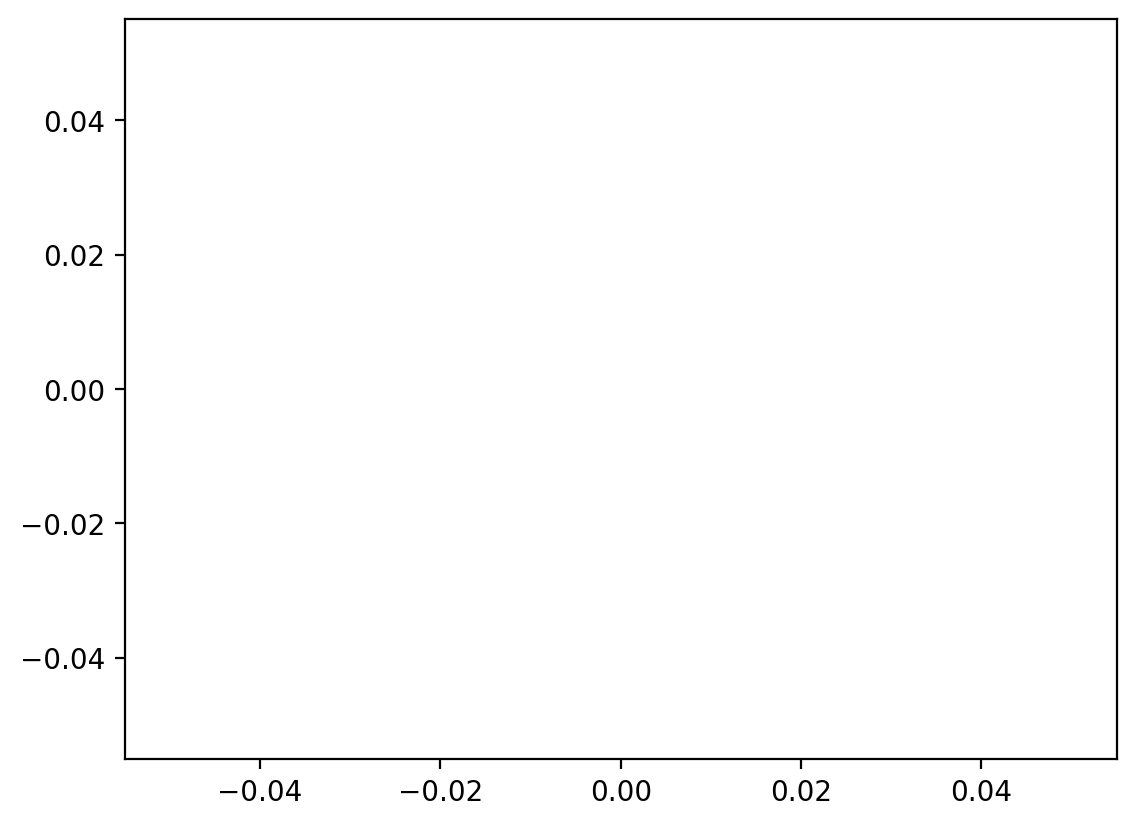